In [51]:
import pandas as pd
import networkx as nx
import matplotlib as mp
import matplotlib.pyplot as pp
from networkx.algorithms import *
import numpy as np

df = pd.read_csv("/home/miroslav/Source/PAWS/paws_mdp_out.txt", sep=" ", index_col = None)

graph = nx.from_pandas_dataframe(df, source='node_from', target='node_to', edge_attr=['distance', 'animal_density', 'grid_cell_x', 'grid_cell_y'])


nx.average_shortest_path_length(graph, weight='distance')


4866.1103416435826

In [2]:
ssp = nx.shortest_simple_paths(graph, source=0.0, target=0.0, weight='distance')
sp = nx.all_simple_paths(graph, source=0.0, target=0.0, cutoff=None)
st = nx.minimum_spanning_tree(graph, weight='distance')
cyc = nx.simple_cycles(graph.to_directed())

In [ ]:
routes = []
for cycle in cyc:
    ssum = 0
    for index, node in enumerate(cycle):
        if index+1 < len(cycle):
            ssum += graph[cycle[index]][cycle[index+1]]['distance']
    if 5000 <= ssum <= 9000:
        routes.append(cycle)
        print(cycle)

# print(routes)

In [6]:
indeces = []
basis = nx.cycle_basis(graph, root=0.0)
for index, value in enumerate(basis):
    if 0.0 in value:
        indeces.append(index)
indeces

[]

In [7]:
ego = nx.ego_graph(graph, 0.0, radius=4000)
for path in (nx.all_simple_paths(ego, source=0, target=0, cutoff=None)):
    print(path)
    break

[0, 15.0, 0]


In [ ]:
for path in nx.all_shortest_paths(graph, 0.0, 0.0, weight='distance'):
    print(path)

In [114]:
df = pd.read_csv("/home/miroslav/Source/research_task/data/paws_mdp_out.txt", sep=" ")
graph = nx.from_pandas_dataframe(df, source='node_from', target='node_to', edge_attr=['distance', 'animal_density', 'grid_cell_x', 'grid_cell_y'])

In [ ]:
import random

dist = pd.read_csv("~/Source/research_task/data/dist.gop", sep=" ", header=None)
dist.iloc[0,:]
cols = []
for index, column in enumerate(dist.iloc[0,:]):
    if 5000 <= dist.iloc[0,index] + dist.iloc[index,0] <= 10000:
        # print(dist.iloc[0,index] + dist.iloc[index,0])
        cols.append(index)
        
routes = []
random_inds = random.sample(cols, 30)
for random_ind in random_inds:
    graph = nx.from_pandas_dataframe(df, source='node_from', target='node_to', edge_attr=['distance', 'animal_density', 'grid_cell_x', 'grid_cell_y'])
    route_to = nx.shortest_path(graph, 0.0, random_ind, 'distance')
    route_to.pop(-1)
    route_to.pop(0)
    try:
        graph.remove_nodes_from(route_to)
        route_from = nx.shortest_path(graph, random_ind, 0.0, 'distance')
        routes.append(route_to + route_from)
        print(route_to + route_from)
    except:
        continue
    
print(routes)

In [41]:
r = nx.fast_gnp_random_graph(20, 0.15)
r = nx.connected_watts_strogatz_graph(20,3,0.5)
r = nx.random_regular_graph(3, 20) # Pick this one!
r = nx.powerlaw_cluster_graph(20, 2, 0.3) # Or this one

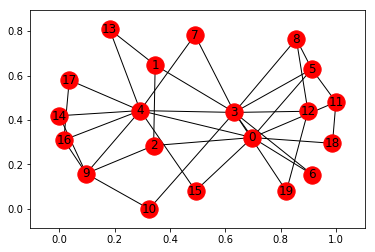

In [47]:
nx.draw_networkx(r, pos=networkx.spring_layout(r))
pp.show()

In [39]:
import random
for (u, v) in r.edges():
    r.edge[u][v]['distance'] = random.randint(0,10)

In [54]:
dist = pd.DataFrame(nx.adjacency_matrix(graph, weight='distance').todense()).replace(to_replace=0, value='inf')
np.fill_diagonal(dist.values, 0)
print(dist)

     0     1     2     3     4     5     6     7     8     9   ...    351  \
0      0   inf   inf   inf   inf   inf   inf   150   inf   inf ...    inf   
1    inf     0  1350   inf  1400   inf  1200   inf   inf   inf ...    inf   
2    inf  1350     0   inf   250   inf   inf   inf   inf   inf ...    inf   
3    inf   inf   inf     0  1000   inf   inf   inf   inf   inf ...    inf   
4    inf  1400   250  1000     0   inf   550   inf   inf   inf ...    inf   
5    inf   inf   inf   inf   inf     0   850  1300  1500   700 ...    inf   
6    inf  1200   inf   inf   550   850     0   inf  1450   inf ...    inf   
7    150   inf   inf   inf   inf  1300   inf     0  1550   650 ...    inf   
8    inf   inf   inf   inf   inf  1500  1450  1550     0  1150 ...    inf   
9    inf   inf   inf   inf   inf   700   inf   650  1150     0 ...    inf   
10   inf   inf   inf   inf   inf  1450   950   inf  1700   800 ...    inf   
11   inf   inf   inf   inf   inf   250   inf   inf  1450   inf ...    inf   

In [63]:
df = pd.read_csv("~/Source/research_task/data/paws_mdp_out.txt", sep=" ")
orig_graph = nx.from_pandas_dataframe(df, source='node_from', target='node_to', edge_attr=['distance', 'animal_density', 'grid_cell_x', 'grid_cell_y'])
orig_graph = nx.subgraph(graph, nx.node_connected_component(orig_graph, 0))
new_graph = nx.Graph()
i = len(orig_graph.nodes())
for edge in orig_graph.edges():
    new_graph.add_node(edge[0], animal_density=0, grid_cell_x=orig_graph[edge[0]][edge[1]]['grid_cell_x'], grid_cell_y=orig_graph[edge[0]][edge[1]]['grid_cell_y'])
    new_graph.add_node(edge[1], animal_density=0, grid_cell_x=orig_graph[edge[0]][edge[1]]['grid_cell_x'], grid_cell_y=orig_graph[edge[0]][edge[1]]['grid_cell_y'])
    new_graph.add_node(i, animal_density=orig_graph[edge[0]][edge[1]]['animal_density'], grid_cell_x=orig_graph[edge[0]][edge[1]]['grid_cell_x'], grid_cell_y=orig_graph[edge[0]][edge[1]]['grid_cell_y'])
    new_graph.add_edge(edge[0],i,distance=orig_graph[edge[0]][edge[1]]['distance']/2)
    new_graph.add_edge(i,edge[1],distance=orig_graph[edge[0]][edge[1]]['distance']/2)
    i+=1
dist = nx.floyd_warshall_numpy(new_graph, weight='distance')
with open('dist_ext.gop', 'w') as f:
    f.write(str(len(new_graph.nodes())) + " 1 0 0\n")
with open('dist_ext.gop', 'ab') as f:
    for line in np.matrix(dist):
        np.savetxt(f, line, fmt='%.2f')
with open('dist_ext.gop', 'a') as f:
    for node in new_graph.nodes_iter():
        f.write(str(nx.get_node_attributes(new_graph, 'animal_density')[node])+"\n")